# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные из соревнования [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('BankChurners.csv', sep=";")
data = data[data.columns[:-1]]

In [3]:
# размер набора данных
data.shape

(3416, 17)

In [4]:
# типы колонок
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                float64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                14
Gender                       8
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Credit_Limit                38
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Trans_Amt              0
Total_Trans_Ct               0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49.0,NaN,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,NaN,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3416


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((3416, 17), (3416, 14))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((3416, 17), (3359, 17))

In [10]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49.0,NaN,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,NaN,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49.0,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,0.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,4716.0,816,28


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Customer_Age. Тип данных float64. Количество пустых значений 14, 0.41%.
Колонка Credit_Limit. Тип данных float64. Количество пустых значений 38, 1.11%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Customer_Age,Credit_Limit
0,45.0,12691.0
1,49.0,8256.0
2,51.0,3418.0
3,40.0,3313.0
4,NaN,4716.0
...,...,...
3411,51.0,5455.0
3412,59.0,9899.0
3413,45.0,15578.0
3414,50.0,15641.0


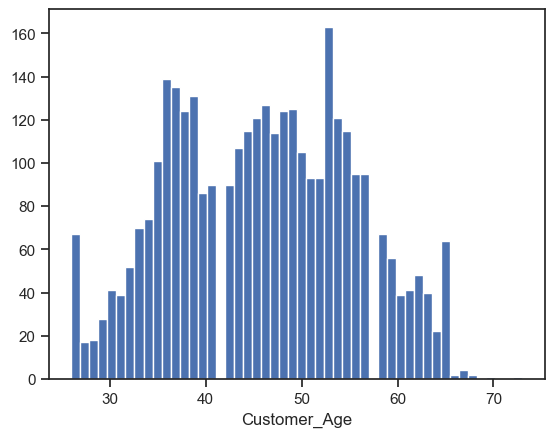

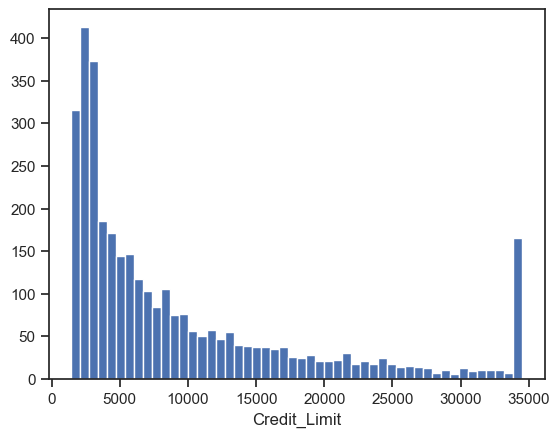

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [15]:
data_num_MasVnrArea = data_num[['Customer_Age']]
data_num_MasVnrArea.head()

,Customer_Age
0,45.0
1,49.0
2,51.0
3,40.0
4,NaN


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([45.83480306, 45.83480306, 45.83480306, 45.83480306, 45.83480306,
        45.83480306, 45.83480306, 45.83480306, 45.83480306, 45.83480306,
        45.83480306, 45.83480306, 45.83480306, 45.83480306]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46.,
        46.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([53., 53., 53., 53., 53., 53., 53., 53., 53., 53., 53., 53., 53.,
        53.]))

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['Customer_Age']].describe()

,Customer_Age
count,3402.000000
mean,45.834803
std,9.523878
min,26.000000
25%,38.000000
50%,46.000000
75%,53.000000
max,73.000000


In [25]:
test_num_impute_col(data, 'Customer_Age', strategies[0])

('Customer_Age', 'mean', 14, 45.834803057025276, 45.834803057025276)

In [26]:
test_num_impute_col(data, 'Customer_Age', strategies[1])

('Customer_Age', 'median', 14, 46.0, 46.0)

In [27]:
test_num_impute_col(data, 'Customer_Age', strategies[2])

('Customer_Age', 'most_frequent', 14, 53.0, 53.0)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Gender. Тип данных object. Количество пустых значений 8, 0.23%.


Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [29]:
cat_temp_data = data[['Gender']]
cat_temp_data.head()

,Gender
0,M
1,NaN
2,M
3,F
4,M


In [30]:
cat_temp_data['Gender'].unique()

array(['M', nan, 'F'], dtype=object)

In [31]:
cat_temp_data[cat_temp_data['Gender'].isnull()].shape

(8, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['M'],
       ['M'],
       ['M'],
       ...,
       ['M'],
       ['F'],
       ['F']], dtype=object)

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['F', 'M'], dtype=object)

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['M'],
       ['NA'],
       ['M'],
       ...,
       ['M'],
       ['F'],
       ['F']], dtype=object)

In [35]:
np.unique(data_imp3)

array(['F', 'M', 'NA'], dtype=object)

In [36]:
data_imp3[data_imp3=='NA'].size

8

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,M
1,M
2,M
3,F
4,M
...,...
3411,F
3412,F
3413,M
3414,F


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cat_enc['c1'].unique()

array(['M', 'F'], dtype=object)

In [40]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [41]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['F', 'M'], dtype=object)

In [42]:
cat_enc_le

array([1, 1, 1, ..., 1, 0, 0])

In [43]:
np.unique(cat_enc_le)

array([0, 1])

In [44]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1])

array(['F', 'M'], dtype=object)

### Использование OrdinalEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
data_oe = data[['Dependent_count', 'Education_Level', 'Marital_Status']]
data_oe.head()

,Dependent_count,Education_Level,Marital_Status
0,3,High School,Married
1,5,Graduate,Single
2,3,Graduate,Married
3,4,High School,Unknown
4,3,Uneducated,Married


In [48]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([[3, 'High School', 'Married'],
       [5, 'Graduate', 'Single'],
       [3, 'Graduate', 'Married'],
       ...,
       [4, 'Graduate', 'Single'],
       [1, 'Graduate', 'Married'],
       [4, 'Graduate', 'Married']], dtype=object)

In [49]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[3., 3., 1.],
       [5., 2., 2.],
       [3., 2., 1.],
       ...,
       [4., 2., 2.],
       [1., 2., 1.],
       [4., 2., 1.]])

In [50]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5.])

In [51]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2., 3., 4., 5., 6.])

In [52]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1., 2., 3.])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['BrkCmn', 'BrkFace', 'NA', 'None', 'Stone'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'NA', 'TA'], dtype=object),
 array(['Fa', 'Gd', 'NA', 'Po', 'TA'], dtype=object)]

In [ ]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['BrkFace', 'Gd', 'TA'],
       ['None', 'Gd', 'TA'],
       ['BrkFace', 'Gd', 'TA'],
       ...,
       ['None', 'TA', 'Gd'],
       ['None', 'TA', 'TA'],
       ['None', 'TA', 'TA']], dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [ ]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [ ]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [ ]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [ ]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [ ]:
cat_enc.shape

(1460, 1)

In [ ]:
cat_enc_ohe.shape

(1460, 4)

In [ ]:
cat_enc_ohe

<1460x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])

In [ ]:
cat_enc.head(10)

,c1
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace
5,None
6,Stone
7,Stone
8,None
9,None


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [ ]:
pd.get_dummies(cat_enc).head()

,c1_BrkCmn,c1_BrkFace,c1_None,c1_Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [ ]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

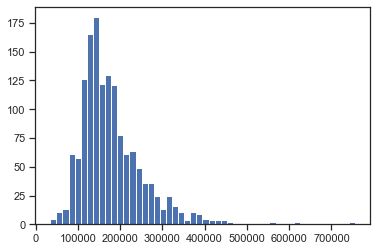

In [ ]:
plt.hist(data['SalePrice'], 50)
plt.show()

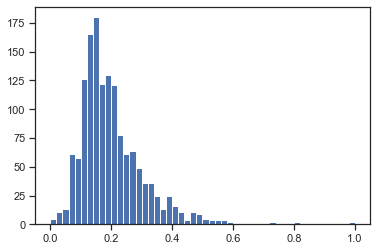

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['SalePrice']])

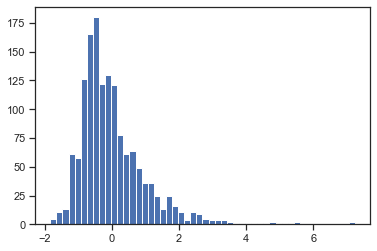

In [ ]:
plt.hist(sc2_data, 50)
plt.show()

# Дополнительные источники
- [Руководство scikit-learn по предобработке данных](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Kaggle Data Cleaning Challenge: Handling missing values (упражнения с пояснениями по обработке пропущенных значений и масштабированию признаков)](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
- [Краткое руководство по категориальным признакам](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)